## Introduction
First, let’s create explainers for random Forest model and linear model

In [44]:
library("DALEX")
library("randomForest")
library("ceterisParibus")
set.seed(59)

# set default theme
theme_set(theme_bw() + theme(text = element_text(size = 18)))

# preprare model
apartments_rf_model <- randomForest(m2.price ~ construction.year + surface + floor +
                        no.rooms + district, 
                        data = apartments)

explainer_rf <- explain(apartments_rf_model,
                        data = apartmentsTest[,2:6], 
                        y = apartmentsTest$m2.price)

## Simple plots
Let’s start with plots for a single observation.

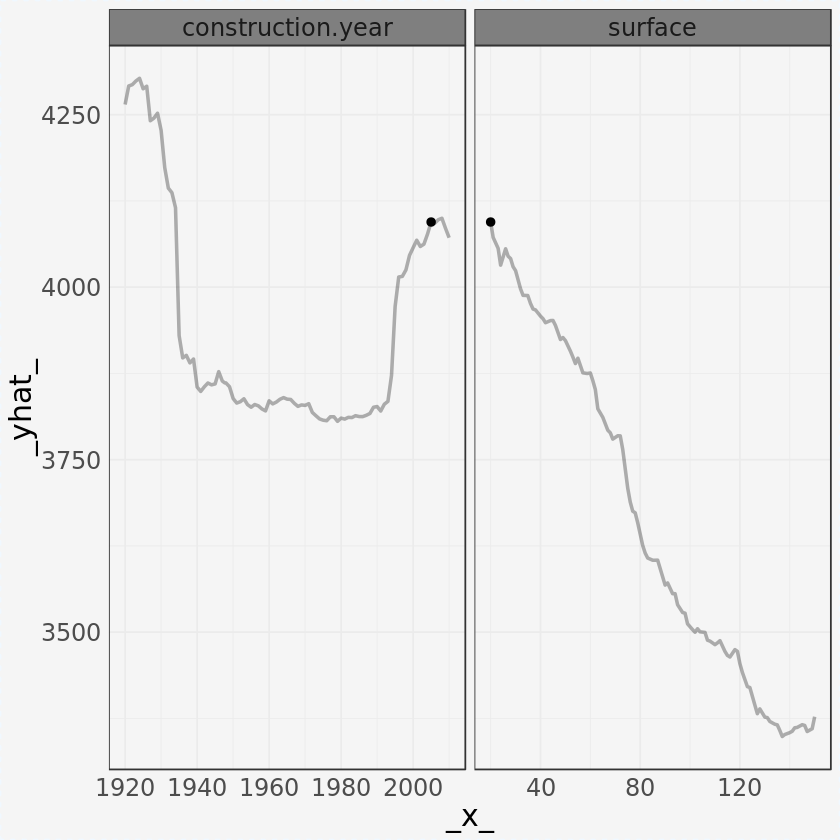

In [45]:
apartments_A <- apartmentsTest[958,]
cp_rf_A <- ceteris_paribus(explainer_rf, apartments_A, y = apartments_A$m2.price)

plot(cp_rf_A, show_profiles = TRUE, show_observations = TRUE, 
     selected_variables = c("surface","construction.year"))

Here are plots for neighbours of this observation.

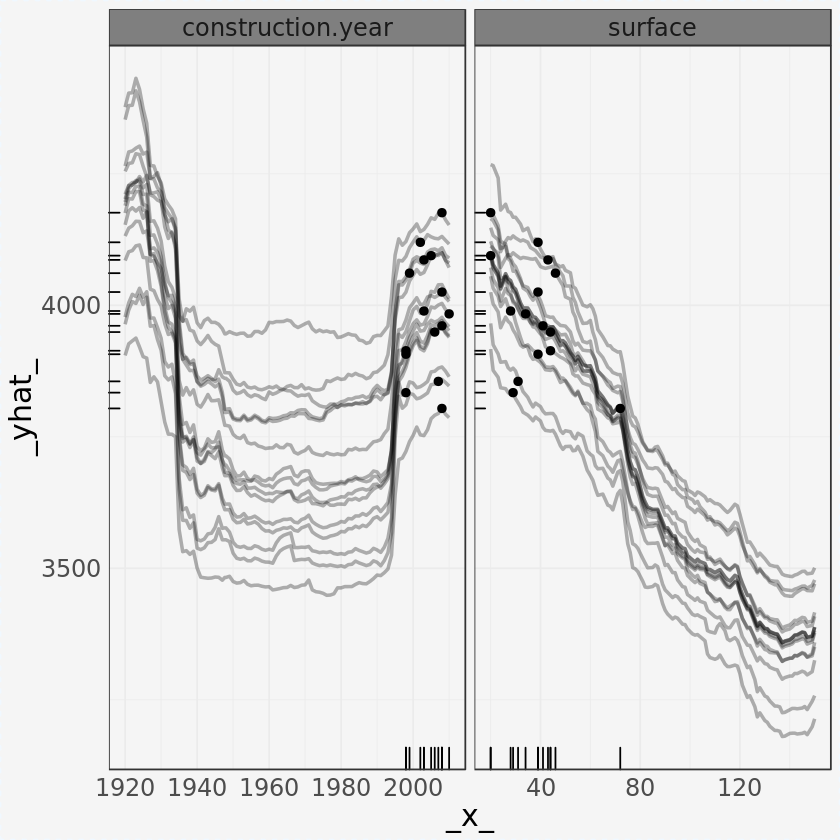

In [46]:
apartments_B <- select_neighbours(apartmentsTest, apartmentsTest[958,], n = 15)
cp_rf_B <- ceteris_paribus(explainer_rf, apartments_B, y = apartments_B$m2.price)

plot(cp_rf_B, 
     show_profiles = TRUE, show_observations = TRUE, show_rugs = TRUE,
     selected_variables = c("surface","construction.year"))

Here we have an example for a subset of observations and only points.

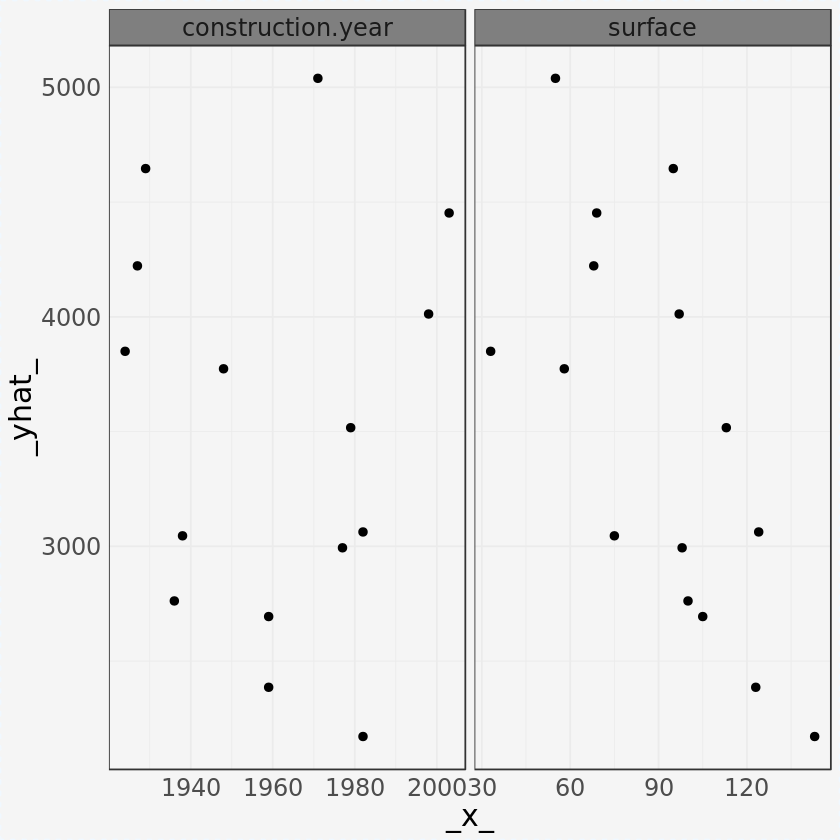

In [47]:
apartments_C <- select_sample(apartmentsTest, n = 15)
cp_rf_C <- ceteris_paribus(explainer_rf, apartments_C, y = apartments_C$m2.price)

plot(cp_rf_C, 
     show_profiles = FALSE, 
     selected_variables = c("surface","construction.year"))

Only rugs

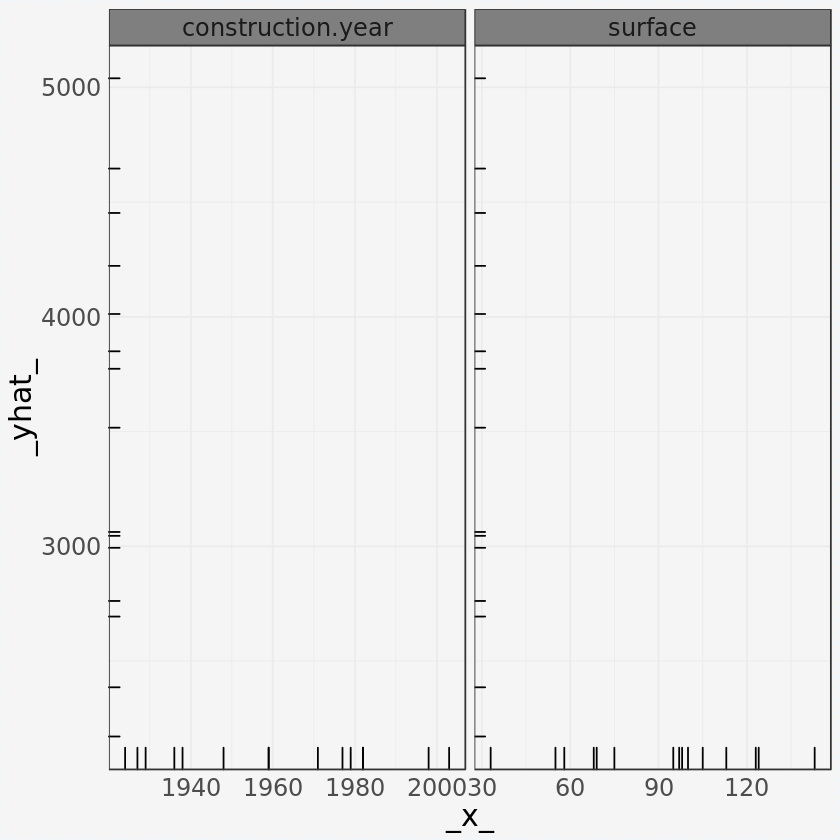

In [48]:
plot(cp_rf_C, 
     show_profiles = FALSE, show_observations = FALSE, show_rugs = TRUE, 
     selected_variables = c("surface","construction.year"))

Only profiles

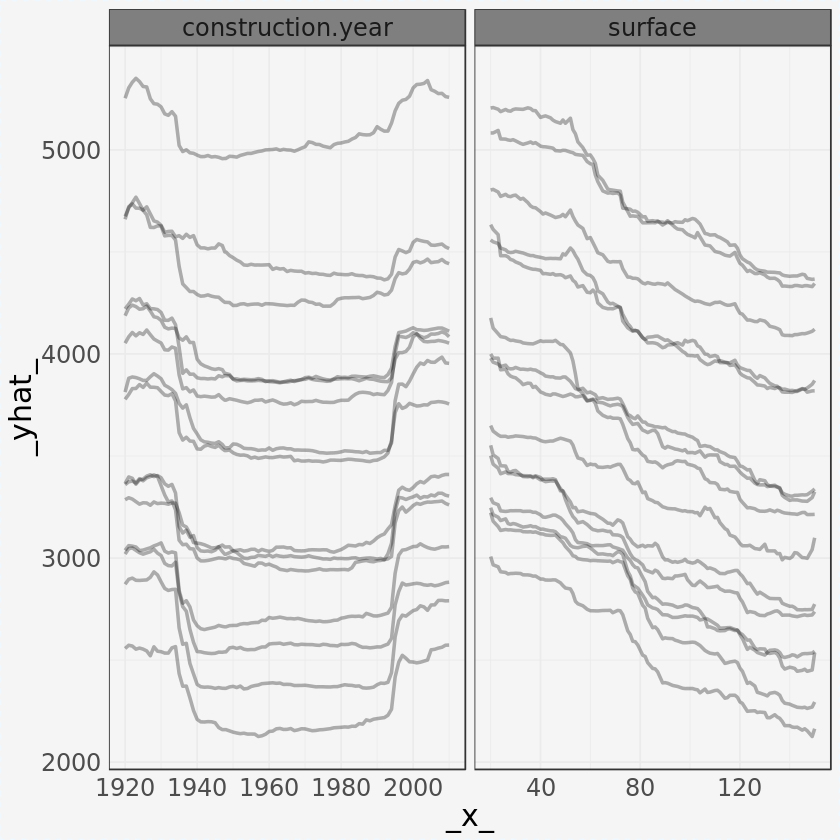

In [49]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = FALSE, 
     selected_variables = c("surface","construction.year")) 

Only residuals

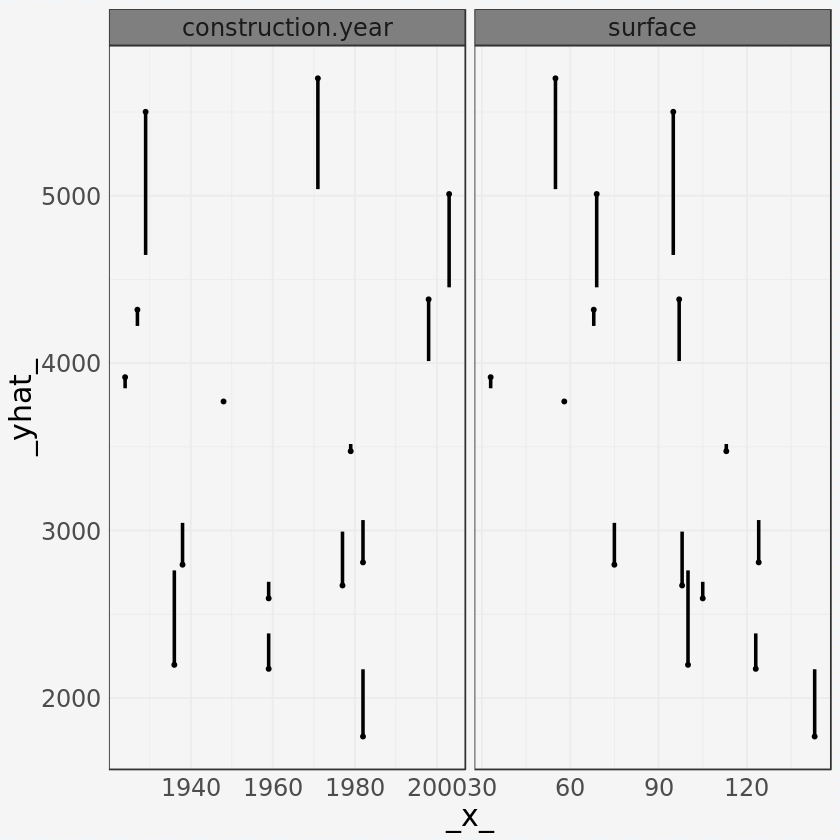

In [50]:
plot(cp_rf_C, 
     show_profiles = FALSE, show_observations = FALSE, show_residuals = TRUE, 
     selected_variables = c("surface","construction.year"))

Only average profile

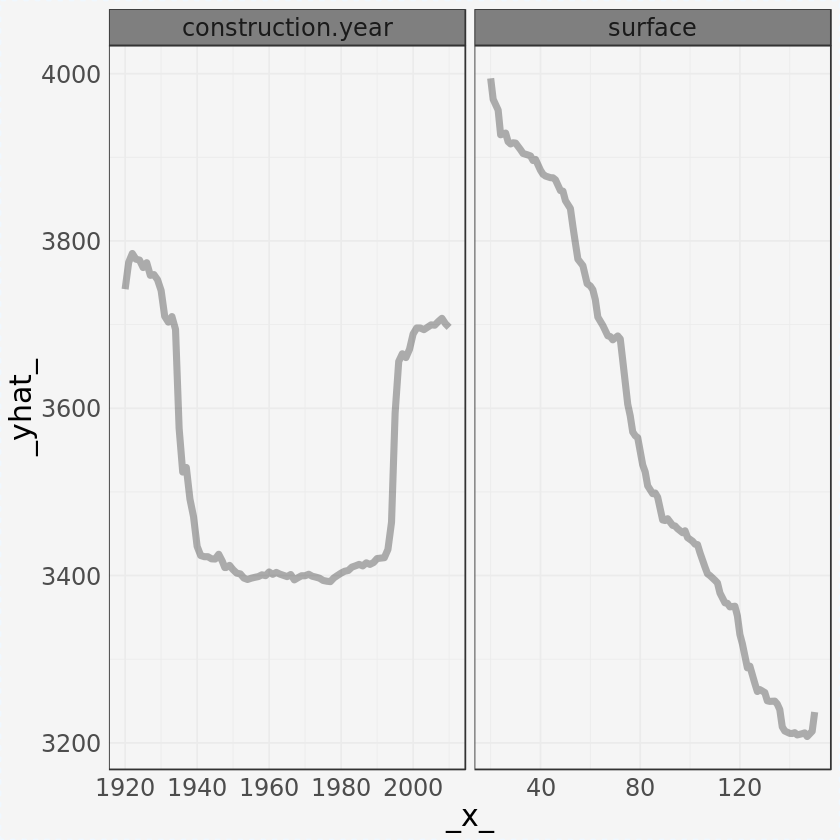

In [51]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = FALSE, 
     aggregate_profiles = mean, size = 2,
     selected_variables = c("surface","construction.year"))

Colors correspond to district

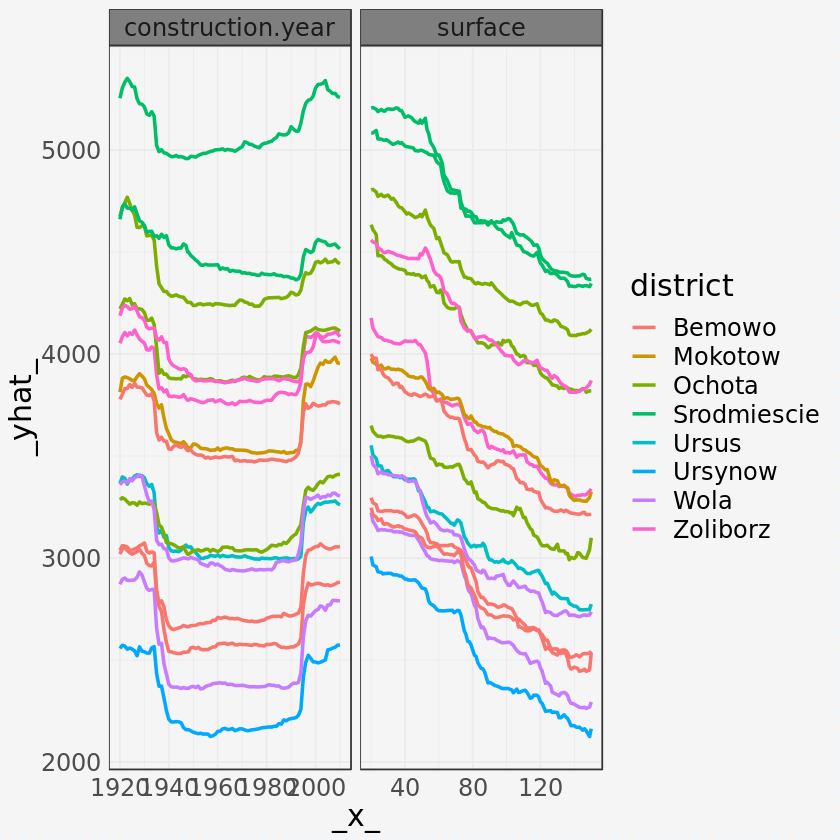

In [52]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = FALSE, 
     color = "district", alpha = 1,
     selected_variables = c("surface","construction.year", "district")) 

Colors correspond to surface.

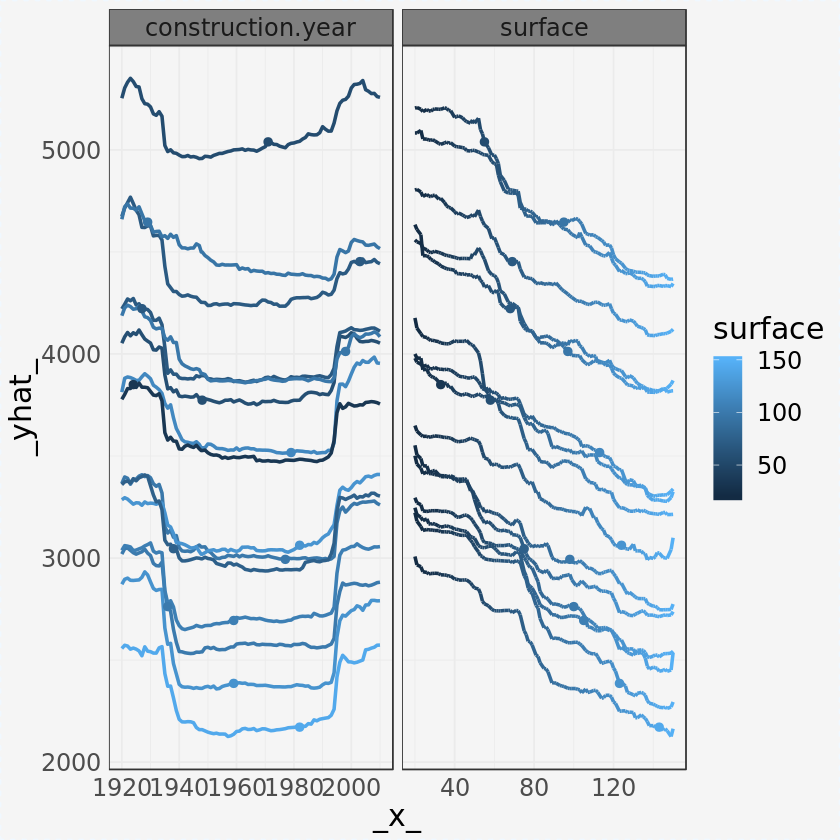

In [53]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = TRUE, 
     color = "surface", alpha = 1, 
     selected_variables = c("surface","construction.year"))

Observations without rugs.

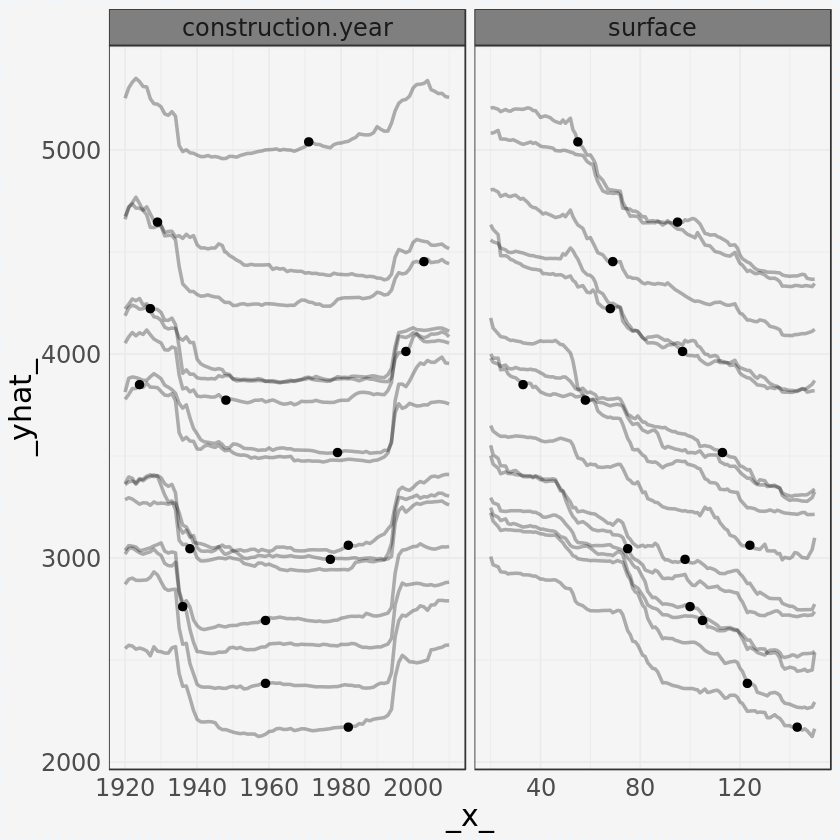

In [54]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = TRUE, 
     selected_variables = c("surface","construction.year"))

Different colors for different elements.

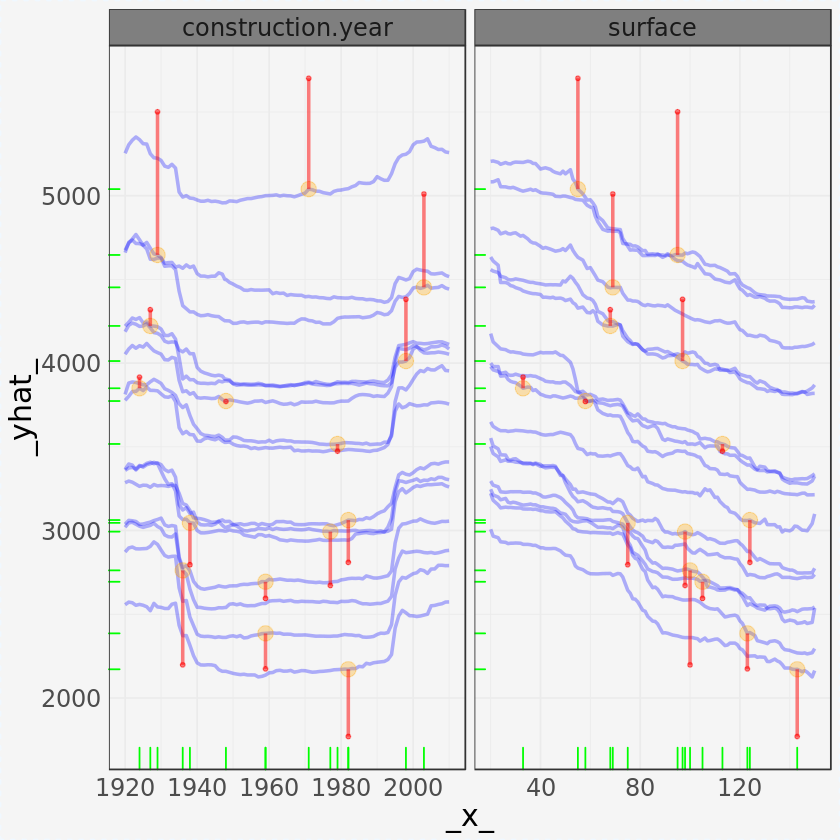

In [55]:
plot(cp_rf_C, 
     show_profiles = TRUE, show_observations = TRUE, show_rugs = TRUE,
     show_residuals = TRUE, 
     color = "blue", color_points = "orange", color_residuals = "red", color_rugs = "green",
     alpha = 0.3, alpha_points = 0.3, alpha_residuals = 0.5, alpha_rugs = 1,
     size_points = 4, size_rugs = 0.5,
     selected_variables = c("surface","construction.year"))

## Complex plots
Here we are going to mix two or more layers.

First one presents individual profiles and the average between profiles.

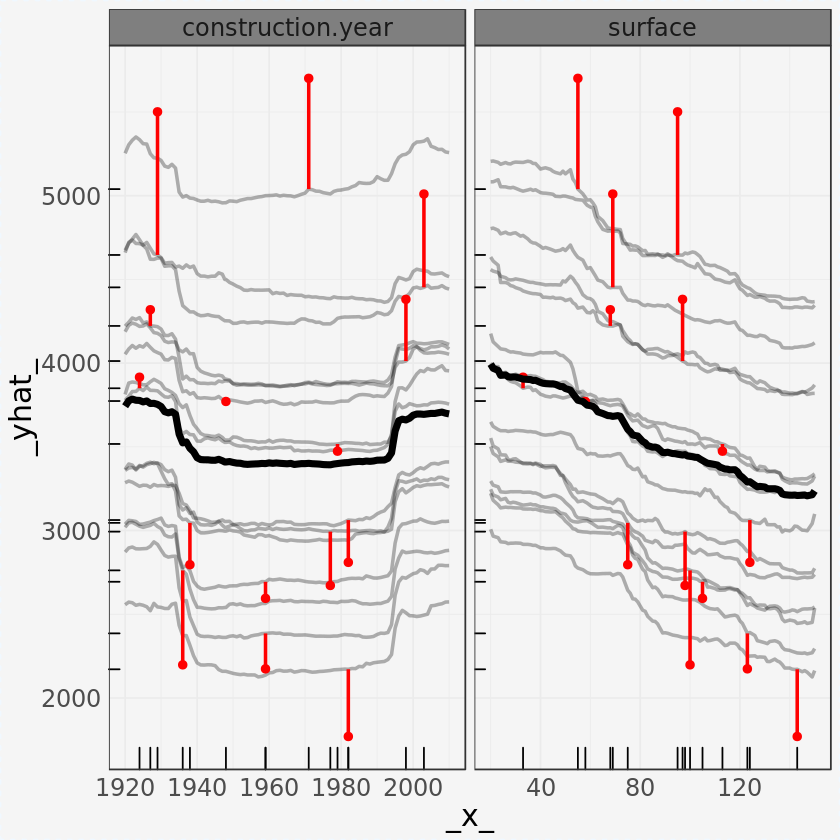

In [56]:
# mixtures

plot(cp_rf_C, 
     show_observations = FALSE, show_rugs = TRUE,
     show_residuals = TRUE, color_residuals = "red", size_residuals = 2,
     selected_variables = c("surface","construction.year")) +
  ceteris_paribus_layer(cp_rf_C, 
            show_observations = FALSE, show_rugs = FALSE,
            aggregate_profiles = mean, size = 2, alpha = 1,
            selected_variables = c("surface","construction.year")) 

Neighbourings for two observations.

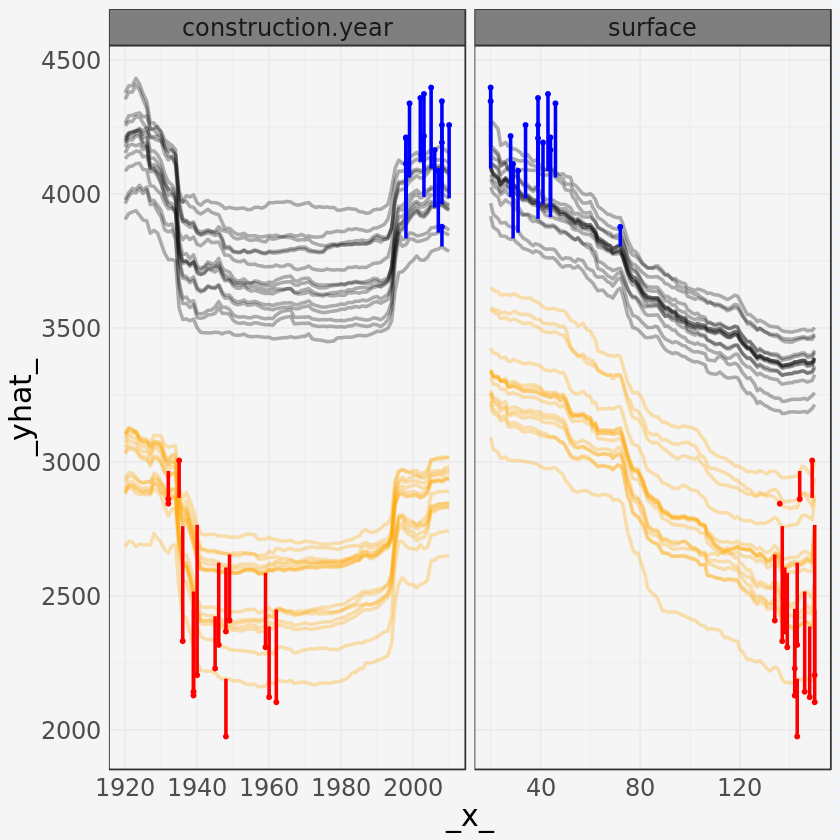

In [57]:
apartments_D <- select_neighbours(apartmentsTest, apartmentsTest[348,], n = 15)
cp_rf_D <- ceteris_paribus(explainer_rf, apartments_D, y = apartments_D$m2.price)

plot(cp_rf_B, 
     show_observations = FALSE, show_residuals = TRUE, 
     color_residuals = "blue",
     selected_variables = c("surface","construction.year")) +
  ceteris_paribus_layer(cp_rf_D, 
          show_observations = FALSE, show_residuals = TRUE, 
          color = "orange", color_residuals = "red",
          selected_variables = c("surface","construction.year")) 

Profiles for two models: random forest and SVM.

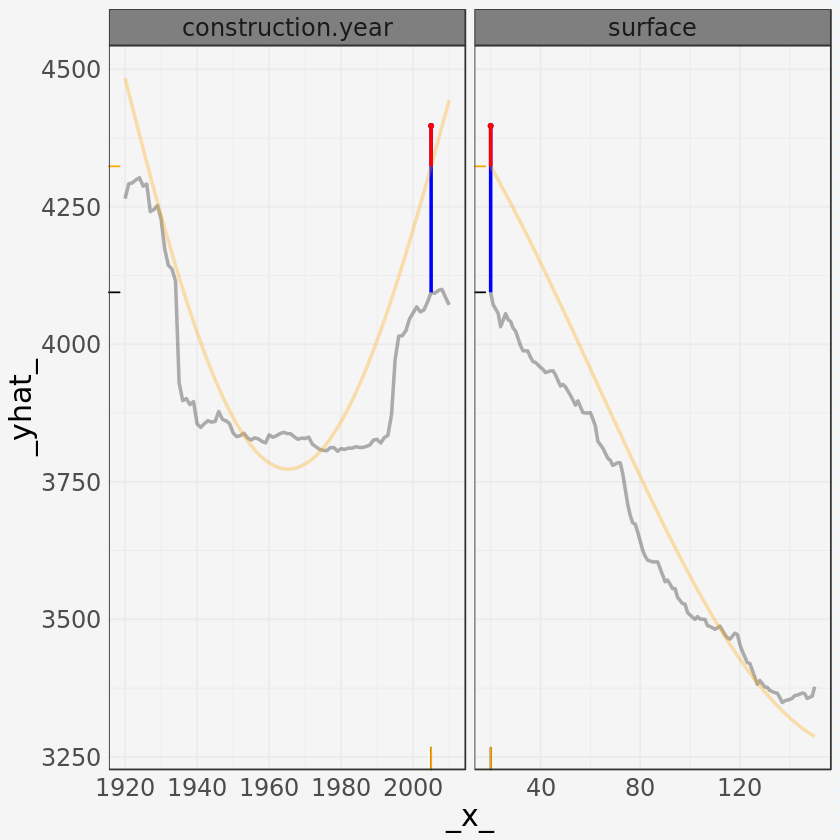

In [58]:
library("rpart")
library("e1071")
apartments_svm_model <- svm(m2.price ~ construction.year + surface + floor + 
                              no.rooms + district, data = apartments)

apartments_rpart_model <- best.rpart(m2.price ~ construction.year + surface + floor + no.rooms + district, data = apartments)

explainer_svm <- explain(apartments_svm_model, 
                         data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)

explainer_rpart <- explain(apartments_rpart_model, 
                         data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)

apartments_E <- apartmentsTest[958,]
cp_rf_E <- ceteris_paribus(explainer_svm, apartments_E, y = apartments_E$m2.price)

apartments_F <- apartmentsTest[958,]
cp_rpart_F <- ceteris_paribus(explainer_rpart, apartments_F, y = apartments_F$m2.price)

plot(cp_rf_A, 
     show_observations = FALSE, show_rugs = TRUE, show_residuals = TRUE, 
     color_residuals = "blue",
     selected_variables = c("surface","construction.year")) +
  ceteris_paribus_layer(cp_rf_E, 
          show_observations = FALSE, show_rugs = TRUE, show_residuals = TRUE, 
          color = "orange", color_residuals = "red",
          selected_variables = c("surface","construction.year"))

Both models in a single layer

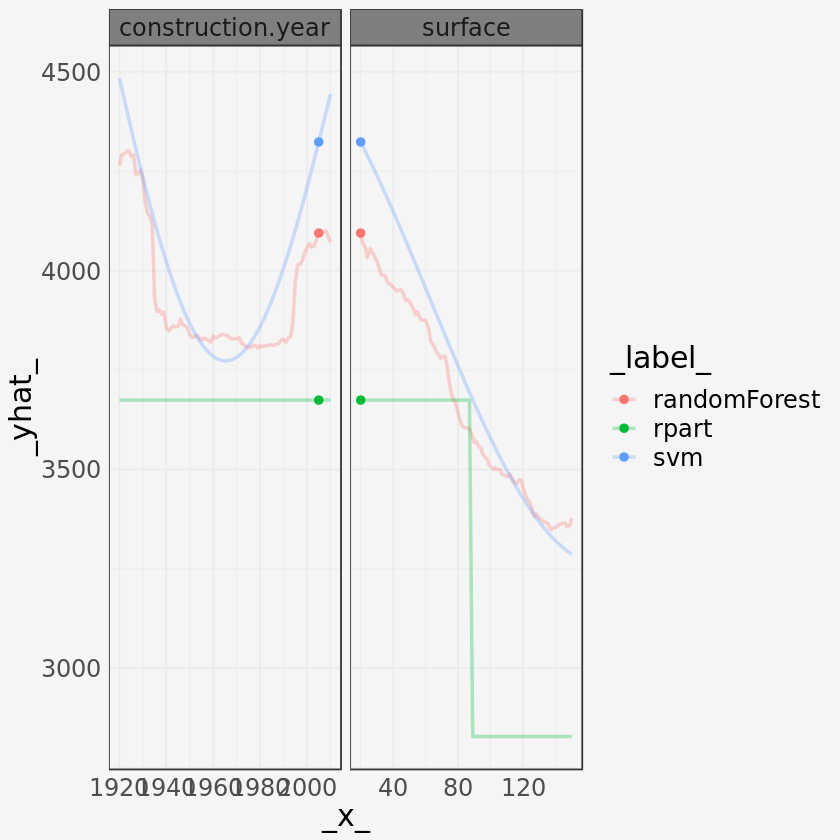

In [59]:
plot(cp_rf_A, cp_rf_E, cp_rpart_F,
     color = "_label_", 
    selected_variables = c("surface","construction.year"))

## Cheatsheet
Images and codes used in the cheatsheet

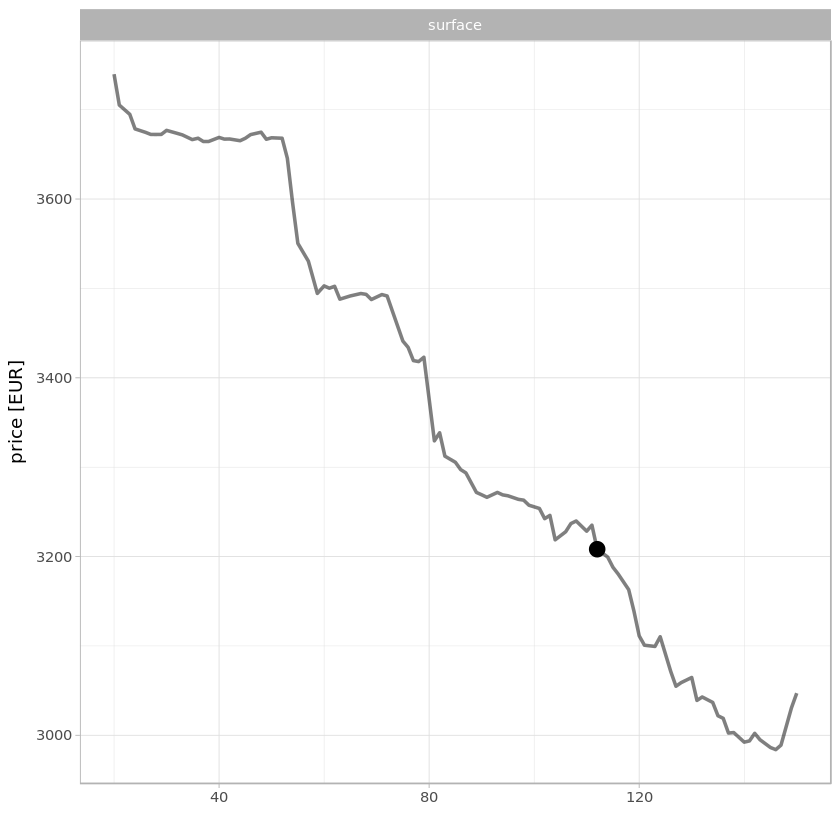

In [60]:
apartments_A <- apartmentsTest[2,]
cp_rf_A <- ceteris_paribus(explainer_rf, apartments_A, y = apartments_A$m2.price)

plot(cp_rf_A,
     alpha = 0.5, size_points = 4, 
     selected_variables = "surface", 
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light()

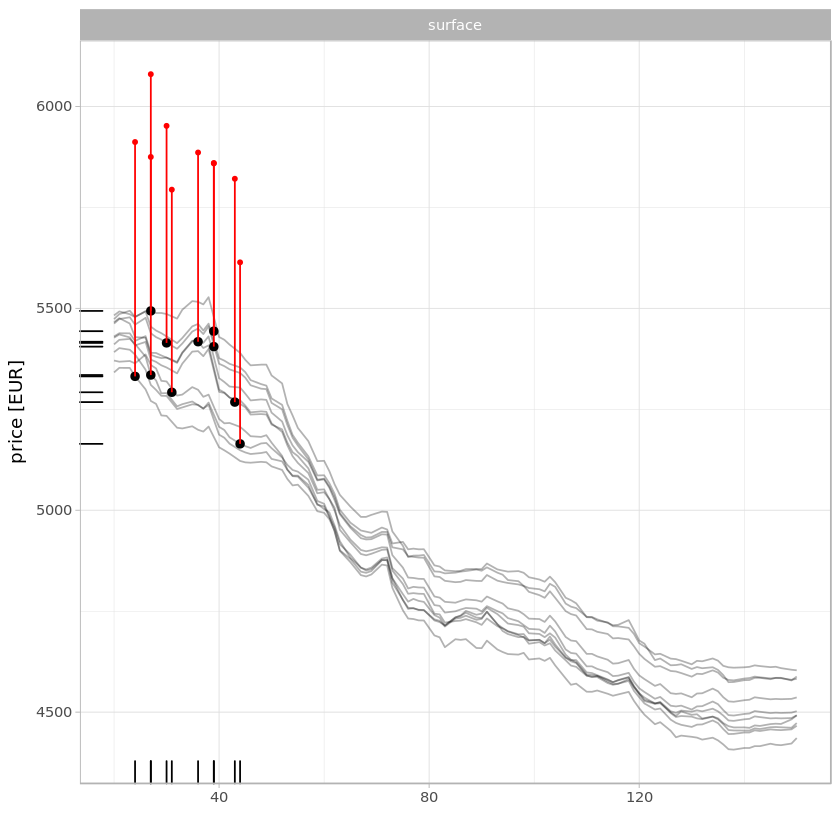

In [61]:
apartments_B <- select_neighbours(apartmentsTest, apartments[1,], n = 10)
cp_rf_B <- ceteris_paribus(explainer_rf, apartments_B, y = apartments_B$m2.price)

plot(cp_rf_B, 
     show_rugs = TRUE, show_residuals = TRUE,
     selected_variables = "surface", color_residuals = "red", size = 0.5,
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light() 

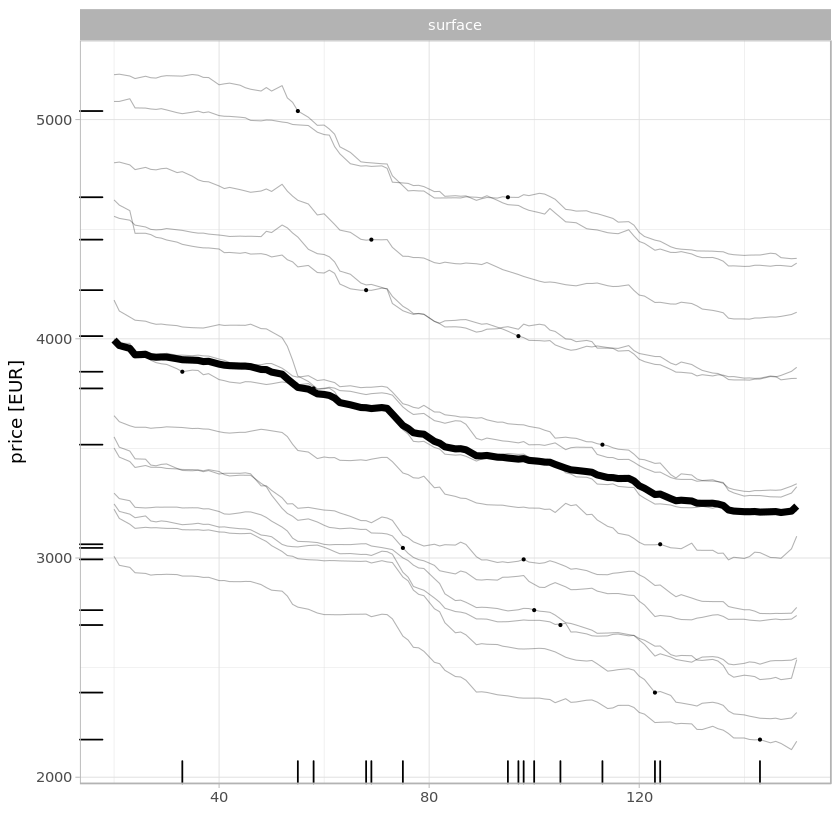

In [62]:
apartments_C <- select_sample(apartmentsTest, n = 15)
cp_rf_C <- ceteris_paribus(explainer_rf, apartments_C, y = apartments_C$m2.price)

plot(cp_rf_C, 
     show_observations = TRUE, show_rugs = TRUE, size = 0.3, size_points = 0.5,
     selected_variables = "surface") +
  ceteris_paribus_layer(cp_rf_C, 
            show_observations = FALSE, 
            aggregate_profiles = mean, size = 2, alpha = 1,
            selected_variables = "surface",
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light() 

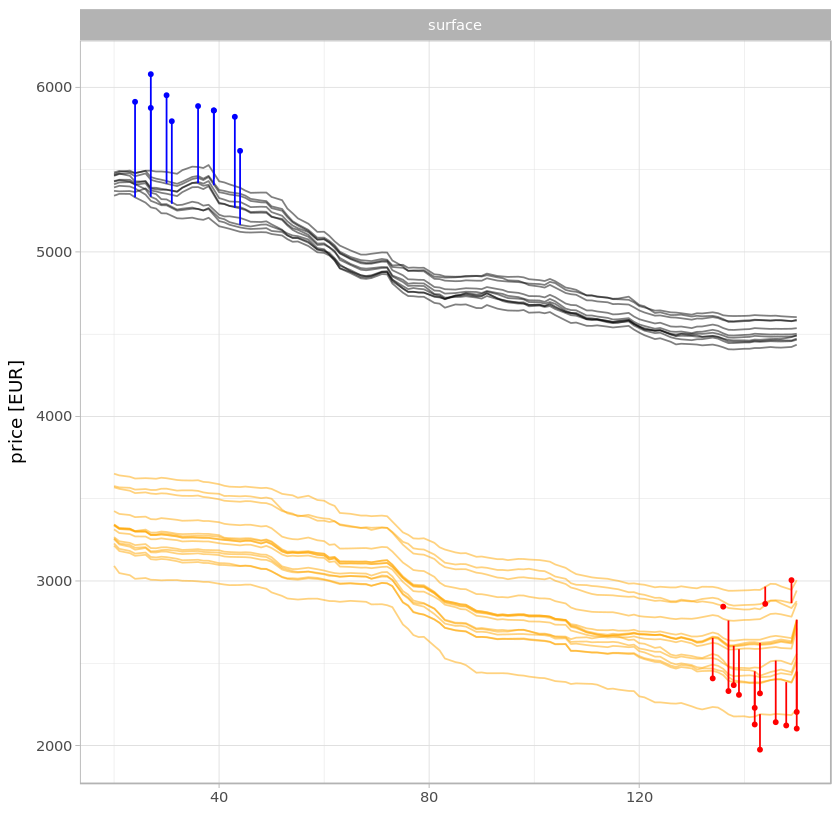

In [63]:
apartments_D <- select_neighbours(apartmentsTest, apartmentsTest[348,], n = 15)
cp_rf_D <- ceteris_paribus(explainer_rf, apartments_D, y = apartments_D$m2.price)

plot(cp_rf_B, 
     show_observations = FALSE, show_residuals = TRUE, 
     color_residuals = "blue", alpha = 0.5, size = 0.5, 
     selected_variables = "surface") +
  ceteris_paribus_layer(cp_rf_D, 
          show_observations = FALSE, show_residuals = TRUE, 
          color = "orange", color_residuals = "red", alpha = 0.5, size = 0.5,
          selected_variables = "surface", 
     as.gg = TRUE) + xlab("") +  theme_light() + ylab("price [EUR]")

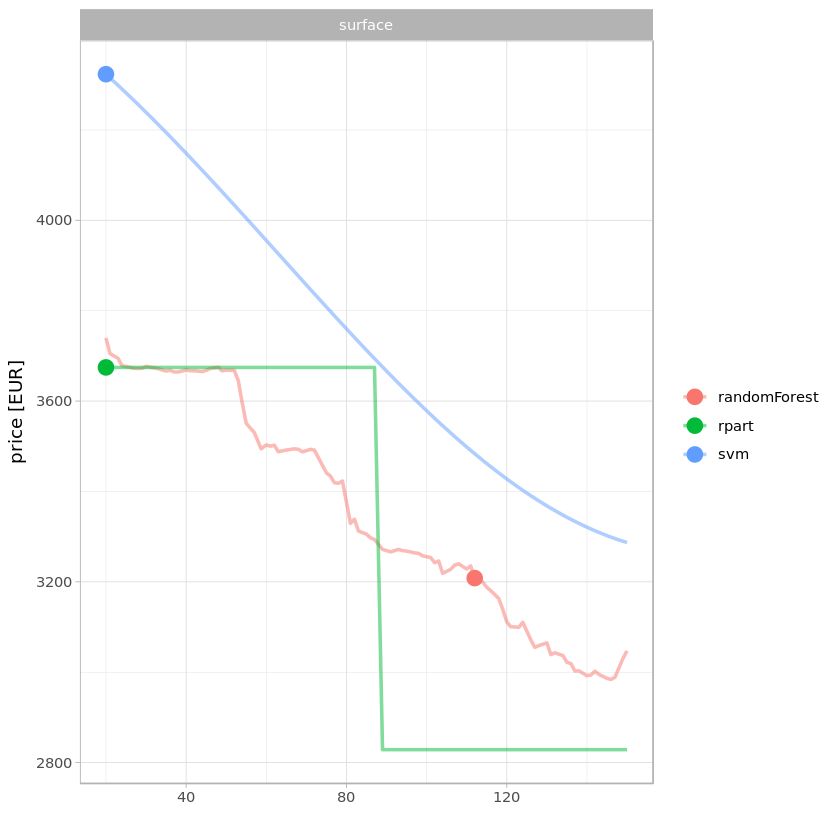

In [64]:
plot(cp_rf_A, cp_rf_E, cp_rpart_F,
     color = "_label_", alpha = 0.5, size_points = 4, 
     selected_variables = "surface", 
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light() + scale_color_discrete(name="")

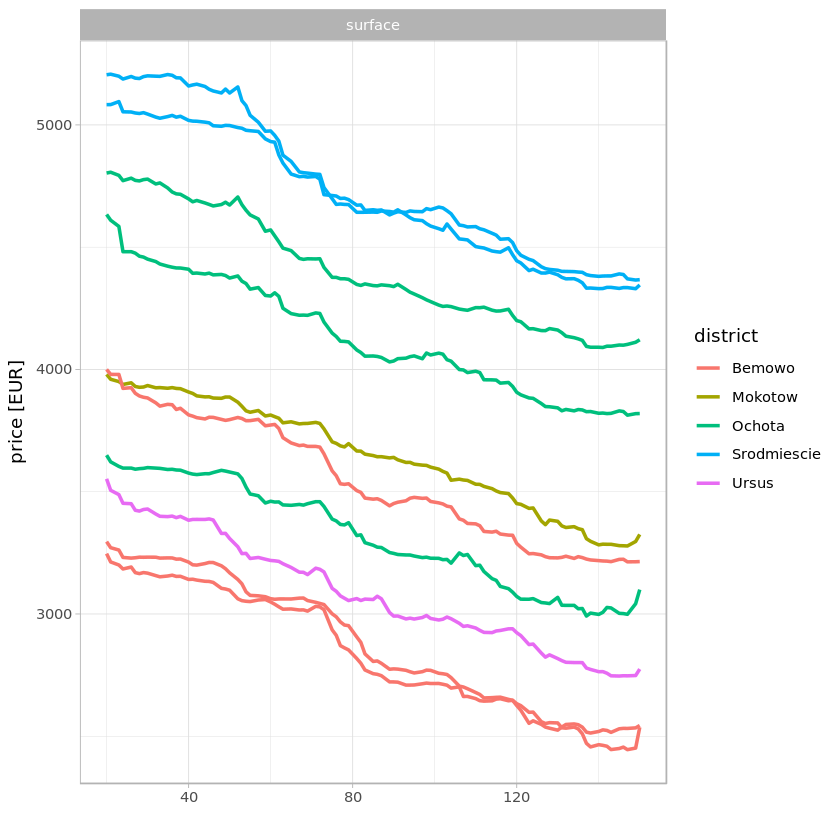

In [65]:
plot(cp_rf_C[as.numeric(cp_rf_C$district) < 8,], 
     show_profiles = TRUE, show_observations = FALSE, 
     color = "district", alpha = 1,
     selected_variables = c("surface", "district"), 
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light() 

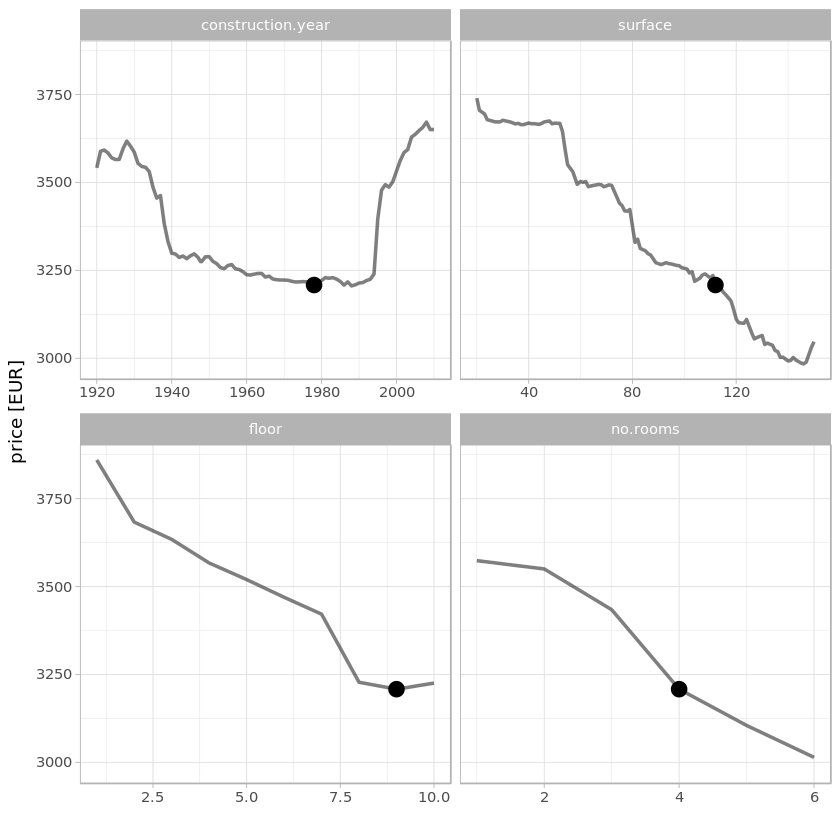

In [66]:
plot(cp_rf_A,
     alpha = 0.5, size_points = 4, 
     as.gg = TRUE) + xlab("") + ylab("price [EUR]") + theme_light()